In [15]:
# log分析
def log_anaylize(path):
    f = open(path)
    lines = f.readlines()
    f.close()
    test_rc = [line for line in lines if 'test' in line.split()]
#     [(epoch, reward)]
    return [(int(record.split()[3]), float(record.split()[5])) for record in test_rc]


# Thoughts
## 2018.1.17
大部分文献中使用$\theta=\{long, neutral, short\}$来表示动作，reward函数由相邻两时刻的价格与动作来表示，例如《Deep Direct Reinforcement Learning for Financial Signal Representation and Trading》中的$R_t=\theta_{t-1} z_t+c|\theta_t-\theta_{t-1}|$ （c是变换动作的惩罚项）。
RL难以解决动作前后有逻辑性的问题（持有不能再买入，空仓不能卖出），先设计如上述action、reward定义的模型，能够识别tend后，考虑使用迁移学习。


## Experinment
### Data
code:000300 From 2007-01-04 TO 2016.12-30 Frequency: min
取2014.1.1开始的20000个数据点（与论文相同），前15000个为training，后5000个test。
取前45min, 3h, 5h, 1day, 3day, 10day作为feature（同样与论文相同），构建Env。
### Params
Eposide：7000
网络结构50*32*32*3
最后一层和action_dim一样，3个Units，之后加softmax，输出为long,neutral,short的概率。

learning rate 0.001
reward decay 0.99

6000次迭代后出现过拟合。
<img src="tb_logs/18.1.18/data.png",width=300,height=300>
<img src="tb_logs/18.1.18/reward.png",width=300,height=300>

## 2018.3.8
尝试使用AC-model

In [16]:
# # Analyze for log(18.1.18)
# import numpy as np
# import matplotlib.pyplot as plt

# # Data
# import sys
# sys.path.append('../trader/Finance')
# from Env import Loader
# loader = Loader("../trader/data/")
# data, info = loader.load("000300")
# # data_DDRLFFSR is start from 2014.1.1, the 407760th point in data
# data_DDRLFFSR = data[407760:407760 + 20000].close
# plt.plot(data_DDRLFFSR)
# plt.show()

# file = open("tb_logs/18.1.18/log.txt", "r")
# temp = [line for line in file.readlines() if line[0:4] == "test"]
# test_reward = [float(log.split(":")[2].split()[0]) for log in temp]
# test_reward = np.array(test_reward)
# plt.plot(test_reward)
# plt.show()

## 2018.3.26

正则化数据

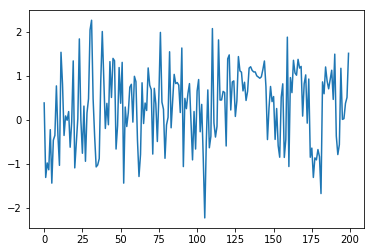

In [14]:
import matplotlib.pyplot as plt

log = log_anaylize("tb_logs/18.3.26/log18.3.26.txt")
plt.plot([r[1] for r in log])
plt.show()